In [1]:
import os
from pathlib import Path
import numpy as np
import zipfile
import shutil
import random
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
SEED = 42
np.random.seed(SEED)

# 1. setup dataset

In [3]:
# set data file name

"""
images
 |- test
     |- salad  70
     |- sushi  70
     |- tofu   70
 |- train
     |- salad 200
     |- sushi 200
     |- tofu  200
"""

data_file = r"./dataset/images.zip"
print("data_file= {}".format(Path(data_file).resolve()))

data_file= F:\GDrive\Programming\Python\MyProject\TekapawSoft\cuisineimageclassifier-folder\cuisineimageclassifier-jupyter\dataset\images.zip


In [4]:
# set relevant directory names

OUTPUT_DIR = Path(Path(data_file).parent.parent, "output").resolve()
print(f"{OUTPUT_DIR= }")

MODEL_DIR = Path(Path(data_file).parent.parent, "model").resolve()
print(f"{MODEL_DIR= }")

OUTPUT_DIR= WindowsPath('F:/GDrive/Programming/Python/MyProject/TekapawSoft/cuisineimageclassifier-folder/cuisineimageclassifier-jupyter/output')
MODEL_DIR= WindowsPath('F:/GDrive/Programming/Python/MyProject/TekapawSoft/cuisineimageclassifier-folder/cuisineimageclassifier-jupyter/model')


In [5]:
# unzip data_file

UNZIP_DIR = Path(OUTPUT_DIR, "unzip_dir")
# UNZIP_DIR = Path(r"W:\output\unzip_dir")  # debug code

if Path(UNZIP_DIR).exists():
    shutil.rmtree(UNZIP_DIR)
        
Path(UNZIP_DIR).mkdir(parents=True)

IMAGES_DIR = Path(UNZIP_DIR, "images")

with zipfile.ZipFile(data_file) as z:
    for info in z.infolist():
        info.filename = info.orig_filename.encode('cp437').decode('cp932')
        z.extract(info, UNZIP_DIR)

for path in UNZIP_DIR.glob("**/Thumbs.db"):  # remove Thumbs.db files
    path.unlink()

In [6]:
# set directory names for train and test dataset

train_dir = Path(IMAGES_DIR, "train")
train_salad_dir = Path(train_dir, "salad")
train_sushi_dir = Path(train_dir, "sushi")
train_tofu_dir = Path(train_dir, "tofu")

test_dir = Path(IMAGES_DIR, "test")
test_salad_dir = Path(test_dir, "salad")
test_sushi_dir = Path(test_dir, "sushi")
test_tofu_dir = Path(test_dir, "tofu")

train_dirs = [train_salad_dir, train_sushi_dir, train_tofu_dir]
test_dirs = [test_salad_dir, test_sushi_dir, test_tofu_dir]

In [7]:
train_dirs

[WindowsPath('F:/GDrive/Programming/Python/MyProject/TekapawSoft/cuisineimageclassifier-folder/cuisineimageclassifier-jupyter/output/unzip_dir/images/train/salad'),
 WindowsPath('F:/GDrive/Programming/Python/MyProject/TekapawSoft/cuisineimageclassifier-folder/cuisineimageclassifier-jupyter/output/unzip_dir/images/train/sushi'),
 WindowsPath('F:/GDrive/Programming/Python/MyProject/TekapawSoft/cuisineimageclassifier-folder/cuisineimageclassifier-jupyter/output/unzip_dir/images/train/tofu')]

In [8]:
# setup validation dataset
# move a half of train dataset to validation dataset

validation_dir = Path(IMAGES_DIR, "validation")
validation_salad_dir = Path(validation_dir, "salad")
validation_sushi_dir = Path(validation_dir, "sushi")
validation_tofu_dir = Path(validation_dir, "tofu")

validation_dirs = [validation_salad_dir, validation_sushi_dir, validation_tofu_dir]

for src, dst in zip(train_dirs, validation_dirs):
    Path(dst).mkdir(parents=True)

    items = [item.name for item in src.iterdir()]
    random.shuffle(items)

    val_size = int(len(os.listdir(src))/2)

    for item in items[:val_size]:
        src_file = Path(src, item)
        dst_file = Path(dst, item)
        shutil.move(src_file, dst_file)

In [9]:
# confirm dataset size

dirs = [*train_dirs, *test_dirs, *validation_dirs]

print("confirm dataset size:")

for _ in dirs:
    print(_, len(os.listdir(_)))

confirm dataset size:
F:\GDrive\Programming\Python\MyProject\TekapawSoft\cuisineimageclassifier-folder\cuisineimageclassifier-jupyter\output\unzip_dir\images\train\salad 100
F:\GDrive\Programming\Python\MyProject\TekapawSoft\cuisineimageclassifier-folder\cuisineimageclassifier-jupyter\output\unzip_dir\images\train\sushi 100
F:\GDrive\Programming\Python\MyProject\TekapawSoft\cuisineimageclassifier-folder\cuisineimageclassifier-jupyter\output\unzip_dir\images\train\tofu 100
F:\GDrive\Programming\Python\MyProject\TekapawSoft\cuisineimageclassifier-folder\cuisineimageclassifier-jupyter\output\unzip_dir\images\test\salad 70
F:\GDrive\Programming\Python\MyProject\TekapawSoft\cuisineimageclassifier-folder\cuisineimageclassifier-jupyter\output\unzip_dir\images\test\sushi 70
F:\GDrive\Programming\Python\MyProject\TekapawSoft\cuisineimageclassifier-folder\cuisineimageclassifier-jupyter\output\unzip_dir\images\test\tofu 70
F:\GDrive\Programming\Python\MyProject\TekapawSoft\cuisineimageclassifier-

sample salad images:


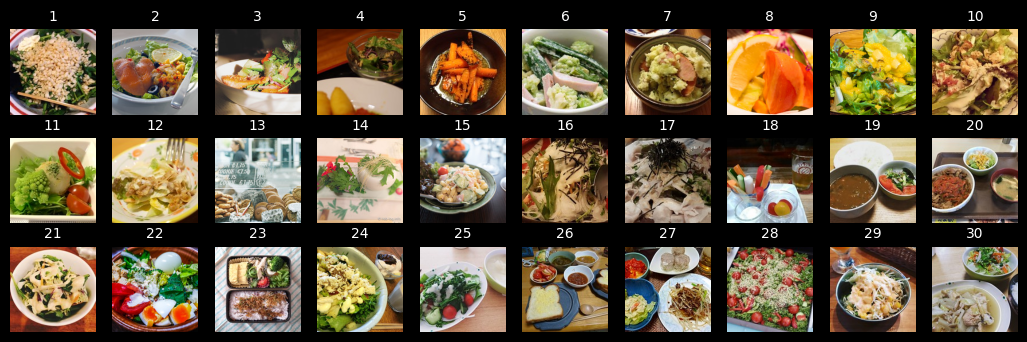

sample sushi images:


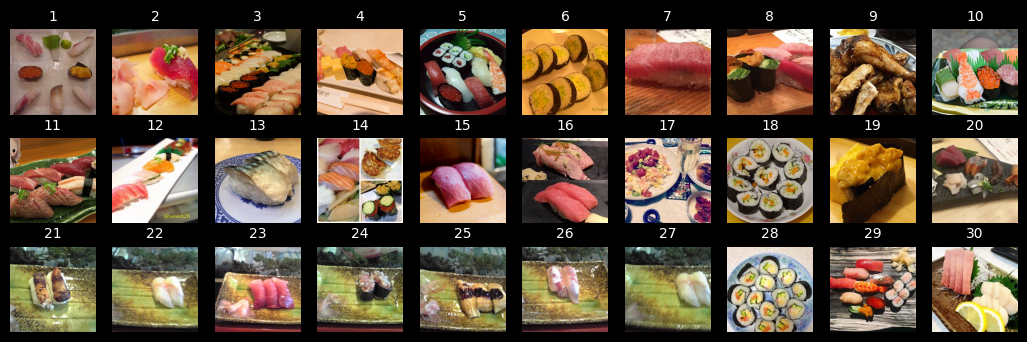

sample tofu images:


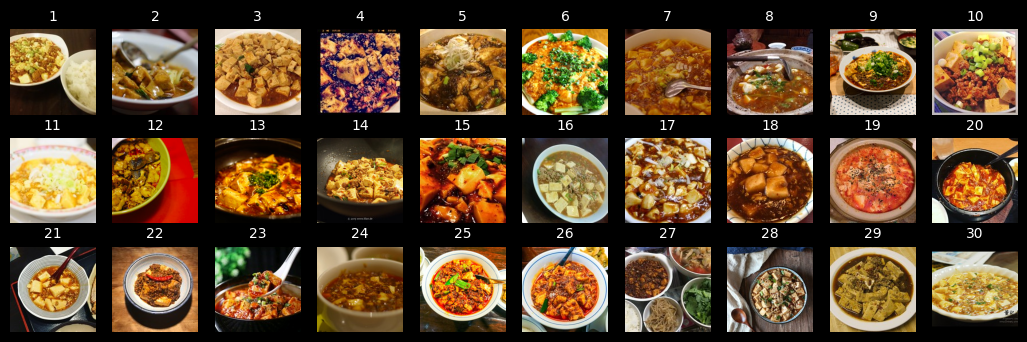

In [10]:
# draw some images

def draw_images(image_files, save_file=None):
    """ draw images """

    row_count = 3
    column_count = 10

    fig, ax = plt.subplots(row_count, column_count, figsize=(13,4), facecolor="k")
    fig.subplots_adjust(wspace=0.2, hspace=0.2)

    for i in range(row_count):
        for j in range(column_count):
            ax[i,j].axis("off")
            ax[i,j].set_title(i*10+j+1, color="w", fontsize=10)
            ax[i,j].imshow(Image.open(image_files[i*10+j]))
    
    if save_file:
        plt.savefig(save_file)
        
    plt.show()
    plt.close()


for dir_path in train_dirs:
    image_files = list()
    for i, path in enumerate(dir_path.iterdir()):
        image_files.append(path)
        if i > 28:
            break
    print("sample " + dir_path.name + " images:")
    draw_images(image_files, save_file=Path(OUTPUT_DIR, f"sampleimages_{dir_path.name}.png"))